In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv("H2full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [3]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [4]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
79325,2017,35
79326,2017,35
79327,2017,35
79328,2017,35


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: object


In [6]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
79325,0.0
79326,0.0
79327,0.0
79328,0.0


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [9]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
6,201527,0.0
10,201527,0.0
11,201527,0.0
12,201527,0.0
...,...,...
33650,201735,1.0
33651,201735,1.0
33652,201735,1.0
33653,201735,1.0


In [10]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
...,...
201731,253.0
201732,269.0
201733,341.0


In [11]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     97.0
201528    153.0
201529    228.0
201530    321.0
201531    159.0
          ...  
201731    253.0
201732    269.0
201733    341.0
201734    201.0
201735    129.0
Name: IsCanceled, Length: 115, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.076840
p-value: 0.028315
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582


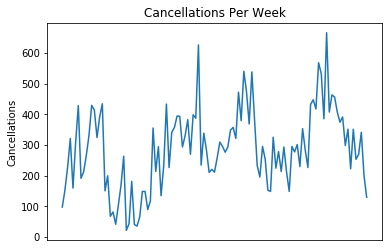

In [13]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [14]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
...,...
201731,253.0
201732,269.0
201733,341.0


In [15]:
df = df[:100]

In [16]:
df

,IsCanceled
FullDate,
201527,97.0
201528,153.0
201529,228.0
201530,321.0
201531,159.0
...,...
201716,417.0
201717,568.0
201718,532.0


In [17]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
df=np.array(df)

In [19]:
df

array([[ 97.],
       [153.],
       [228.],
       [321.],
       [159.],
       [308.],
       [428.],
       [191.],
       [212.],
       [266.],
       [331.],
       [429.],
       [414.],
       [324.],
       [391.],
       [434.],
       [150.],
       [199.],
       [ 67.],
       [ 81.],
       [ 41.],
       [103.],
       [169.],
       [263.],
       [ 21.],
       [ 43.],
       [181.],
       [ 40.],
       [ 35.],
       [ 65.],
       [148.],
       [148.],
       [ 89.],
       [117.],
       [355.],
       [213.],
       [294.],
       [134.],
       [233.],
       [433.],
       [226.],
       [341.],
       [357.],
       [394.],
       [393.],
       [293.],
       [330.],
       [382.],
       [269.],
       [398.],
       [387.],
       [626.],
       [234.],
       [338.],
       [283.],
       [210.],
       [220.],
       [211.],
       [257.],
       [309.],
       [295.],
       [276.],
       [293.],
       [348.],
       [357.],
       [321.],
       [47

In [20]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.11782946],
       [0.20465116],
       [0.32093023],
       [0.46511628],
       [0.21395349],
       [0.44496124],
       [0.63100775],
       [0.26356589],
       [0.29612403],
       [0.37984496],
       [0.48062016],
       [0.63255814],
       [0.60930233],
       [0.46976744],
       [0.57364341],
       [0.64031008],
       [0.2       ],
       [0.27596899],
       [0.07131783],
       [0.09302326],
       [0.03100775],
       [0.12713178],
       [0.22945736],
       [0.3751938 ],
       [0.        ],
       [0.03410853],
       [0.24806202],
       [0.02945736],
       [0.02170543],
       [0.06821705],
       [0.19689922],
       [0.19689922],
       [0.10542636],
       [0.14883721],
       [0.51782946],
       [0.29767442],
       [0.42325581],
       [0.1751938 ],
       [0.32868217],
       [0.63875969],
       [0.31782946],
       [0.49612403],
       [0.52093023],
       [0.57829457],
       [0.57674419],
       [0.42170543],
       [0.47906977],
       [0.559

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [22]:
X_train

array([[0.11782946, 0.20465116, 0.32093023, 0.46511628, 0.21395349],
       [0.20465116, 0.32093023, 0.46511628, 0.21395349, 0.44496124],
       [0.32093023, 0.46511628, 0.21395349, 0.44496124, 0.63100775],
       [0.46511628, 0.21395349, 0.44496124, 0.63100775, 0.26356589],
       [0.21395349, 0.44496124, 0.63100775, 0.26356589, 0.29612403],
       [0.44496124, 0.63100775, 0.26356589, 0.29612403, 0.37984496],
       [0.63100775, 0.26356589, 0.29612403, 0.37984496, 0.48062016],
       [0.26356589, 0.29612403, 0.37984496, 0.48062016, 0.63255814],
       [0.29612403, 0.37984496, 0.48062016, 0.63255814, 0.60930233],
       [0.37984496, 0.48062016, 0.63255814, 0.60930233, 0.46976744],
       [0.48062016, 0.63255814, 0.60930233, 0.46976744, 0.57364341],
       [0.63255814, 0.60930233, 0.46976744, 0.57364341, 0.64031008],
       [0.60930233, 0.46976744, 0.57364341, 0.64031008, 0.2       ],
       [0.46976744, 0.57364341, 0.64031008, 0.2       , 0.27596899],
       [0.57364341, 0.64031008, 0.

In [23]:
Y_train

array([0.44496124, 0.63100775, 0.26356589, 0.29612403, 0.37984496,
       0.48062016, 0.63255814, 0.60930233, 0.46976744, 0.57364341,
       0.64031008, 0.2       , 0.27596899, 0.07131783, 0.09302326,
       0.03100775, 0.12713178, 0.22945736, 0.3751938 , 0.        ,
       0.03410853, 0.24806202, 0.02945736, 0.02170543, 0.06821705,
       0.19689922, 0.19689922, 0.10542636, 0.14883721, 0.51782946,
       0.29767442, 0.42325581, 0.1751938 , 0.32868217, 0.63875969,
       0.31782946, 0.49612403, 0.52093023, 0.57829457, 0.57674419,
       0.42170543, 0.47906977, 0.55968992, 0.38449612, 0.58449612,
       0.56744186, 0.9379845 , 0.33023256, 0.49147287, 0.40620155,
       0.29302326, 0.30852713, 0.29457364, 0.36589147, 0.44651163,
       0.4248062 , 0.39534884, 0.42170543, 0.50697674, 0.52093023,
       0.46511628, 0.69922481, 0.55503876, 0.80465116, 0.70077519,
       0.5379845 , 0.80155039, 0.5627907 , 0.32868217, 0.26976744,
       0.4248062 , 0.35968992, 0.20310078, 0.19689922])

Train on 59 samples, validate on 15 samples
Epoch 1/20
59/59 - 0s - loss: 0.1004 - val_loss: 0.1100
Epoch 2/20
59/59 - 0s - loss: 0.0484 - val_loss: 0.0474
Epoch 3/20
59/59 - 0s - loss: 0.0287 - val_loss: 0.0296
Epoch 4/20
59/59 - 0s - loss: 0.0258 - val_loss: 0.0267
Epoch 5/20
59/59 - 0s - loss: 0.0255 - val_loss: 0.0264
Epoch 6/20
59/59 - 0s - loss: 0.0253 - val_loss: 0.0255
Epoch 7/20
59/59 - 0s - loss: 0.0254 - val_loss: 0.0254
Epoch 8/20
59/59 - 0s - loss: 0.0250 - val_loss: 0.0260
Epoch 9/20
59/59 - 0s - loss: 0.0251 - val_loss: 0.0253
Epoch 10/20
59/59 - 0s - loss: 0.0248 - val_loss: 0.0253
Epoch 11/20
59/59 - 0s - loss: 0.0246 - val_loss: 0.0248
Epoch 12/20
59/59 - 0s - loss: 0.0250 - val_loss: 0.0246
Epoch 13/20
59/59 - 0s - loss: 0.0250 - val_loss: 0.0246
Epoch 14/20
59/59 - 0s - loss: 0.0245 - val_loss: 0.0245
Epoch 15/20
59/59 - 0s - loss: 0.0243 - val_loss: 0.0250
Epoch 16/20
59/59 - 0s - loss: 0.0247 - val_loss: 0.0240
Epoch 17/20
59/59 - 0s - loss: 0.0245 - val_loss: 0.0

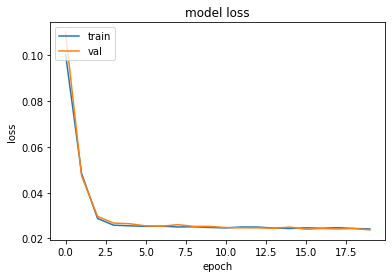

In [24]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [26]:
trainpred

array([[0.32897526],
       [0.40430683],
       [0.45102513],
       [0.38054663],
       [0.4082244 ],
       [0.37430447],
       [0.38333184],
       [0.4707235 ],
       [0.5076707 ],
       [0.5056894 ],
       [0.52878624],
       [0.52629375],
       [0.40548402],
       [0.39629686],
       [0.23930062],
       [0.20271644],
       [0.17901056],
       [0.18852077],
       [0.22792895],
       [0.2958971 ],
       [0.22722018],
       [0.22402991],
       [0.23247384],
       [0.16225797],
       [0.18822497],
       [0.17914951],
       [0.19923356],
       [0.22752652],
       [0.22814502],
       [0.24171479],
       [0.33881348],
       [0.31493035],
       [0.39572418],
       [0.33696407],
       [0.33925784],
       [0.4282834 ],
       [0.37352812],
       [0.45891798],
       [0.46343744],
       [0.47589648],
       [0.5144316 ],
       [0.48016864],
       [0.4809599 ],
       [0.47965086],
       [0.43302244],
       [0.49638462],
       [0.49047226],
       [0.598

In [27]:
valpred

array([[0.35867757],
       [0.32044363],
       [0.37255108],
       [0.35630298],
       [0.40184802],
       [0.39551514],
       [0.43648255],
       [0.41124535],
       [0.39343852],
       [0.4814753 ],
       [0.49344712],
       [0.5290649 ],
       [0.6214334 ],
       [0.62983704]], dtype=float32)

In [28]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [29]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 99.76 RMSE
Validation Score: 96.76 RMSE


In [30]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [31]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

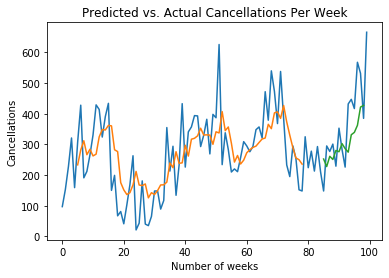

In [32]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.show()

In [33]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [34]:
Y_val

0     148.0
1     295.0
2     277.0
3     301.0
4     229.0
5     353.0
6     283.0
7     226.0
8     432.0
9     447.0
10    417.0
11    568.0
12    532.0
13    385.0
dtype: float64

In [35]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [36]:
predictions

0     252.347031
1     227.686142
2     261.295441
3     250.815430
4     280.191986
5     276.107269
6     302.531250
7     286.253265
8     274.767853
9     331.551575
10    339.273407
11    362.246857
12    421.824524
13    427.244904
dtype: float32

In [37]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [38]:
mda(Y_val, predictions)

0.8571428571428571

In [39]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 96.761472


In [40]:
forecast_error = (predictions-Y_val)
forecast_error

0     104.347031
1     -67.313858
2     -15.704559
3     -50.184570
4      51.191986
5     -76.892731
6      19.531250
7      60.253265
8    -157.232147
9    -115.448425
10    -77.726593
11   -205.753143
12   -110.175476
13     42.244904
dtype: float64

In [41]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-42.77593340192522

In [42]:
X_train

array([[[0.11782946, 0.20465116, 0.32093023, 0.46511628, 0.21395349]],

       [[0.20465116, 0.32093023, 0.46511628, 0.21395349, 0.44496124]],

       [[0.32093023, 0.46511628, 0.21395349, 0.44496124, 0.63100775]],

       [[0.46511628, 0.21395349, 0.44496124, 0.63100775, 0.26356589]],

       [[0.21395349, 0.44496124, 0.63100775, 0.26356589, 0.29612403]],

       [[0.44496124, 0.63100775, 0.26356589, 0.29612403, 0.37984496]],

       [[0.63100775, 0.26356589, 0.29612403, 0.37984496, 0.48062016]],

       [[0.26356589, 0.29612403, 0.37984496, 0.48062016, 0.63255814]],

       [[0.29612403, 0.37984496, 0.48062016, 0.63255814, 0.60930233]],

       [[0.37984496, 0.48062016, 0.63255814, 0.60930233, 0.46976744]],

       [[0.48062016, 0.63255814, 0.60930233, 0.46976744, 0.57364341]],

       [[0.63255814, 0.60930233, 0.46976744, 0.57364341, 0.64031008]],

       [[0.60930233, 0.46976744, 0.57364341, 0.64031008, 0.2       ]],

       [[0.46976744, 0.57364341, 0.64031008, 0.2       , 0.27596

In [43]:
# Test (unseen) predictions
# (t) and (t-5)
Xnew = np.array([[407,463,456,407,374],[463,456,407,374,391],[456,407,374,391,298],[407,374,391,298,351],[374,391,298,351,222],[391,298,351,222,351],[298,351,222,351,253],[351,222,351,253,269],[222,351,253,269,341],[351,253,269,341,201]])

In [44]:
Xnew

array([[407, 463, 456, 407, 374],
       [463, 456, 407, 374, 391],
       [456, 407, 374, 391, 298],
       [407, 374, 391, 298, 351],
       [374, 391, 298, 351, 222],
       [391, 298, 351, 222, 351],
       [298, 351, 222, 351, 253],
       [351, 222, 351, 253, 269],
       [222, 351, 253, 269, 341],
       [351, 253, 269, 341, 201]])

In [45]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [46]:
Xnew.shape

(10, 5)

In [47]:
ynew

array([[0.7657795 ],
       [0.7248678 ],
       [0.5630732 ],
       [0.58574754],
       [0.34254575],
       [0.4646945 ],
       [0.32259655],
       [0.33322692],
       [0.44737512],
       [0.23379984]], dtype=float32)

In [48]:
type(ynew)

numpy.ndarray

In [49]:
ynew.shape

(10, 1)

In [50]:
actual = np.array([[391,298,351,222,351,253,269,341,201,129]])

In [51]:
actual=actual.reshape(10,-1)
actual.shape

(10, 1)

In [52]:
actual

array([[391],
       [298],
       [351],
       [222],
       [351],
       [253],
       [269],
       [341],
       [201],
       [129]])

In [53]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [54]:
np.min(df)

0.0

In [55]:
ynew

array([0.7657795 , 0.7248678 , 0.5630732 , 0.58574754, 0.34254575,
       0.4646945 , 0.32259655, 0.33322692, 0.44737512, 0.23379984],
      dtype=float32)

In [56]:
maxcancel=np.max(tseries)

In [57]:
mincancel=np.min(tseries)

In [58]:
ynew = ynew * np.abs(maxcancel-mincancel) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [59]:
actualpd

0    391
1    298
2    351
3    222
4    351
5    253
6    269
7    341
8    201
9    129
dtype: int64

In [60]:
ynewpd

0    514.927734
1    488.539734
2    384.182220
3    398.807159
4    241.942001
5    320.727966
6    229.074768
7    235.931366
8    309.556946
9    171.800903
dtype: float32

In [61]:
mda(actualpd, ynewpd)

0.8

In [62]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 112.585967


In [63]:
forecast_error = (ynewpd-actualpd)
forecast_error

0    123.927734
1    190.539734
2     33.182220
3    176.807159
4   -109.057999
5     67.727966
6    -39.925232
7   -105.068634
8    108.556946
9     42.800903
dtype: float64

In [64]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

48.94907989501953

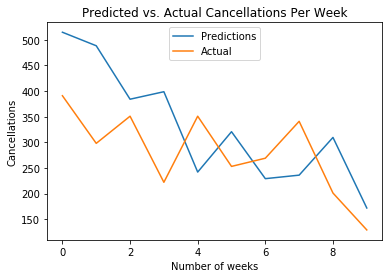

In [65]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()

## Memory Usage

In [1]:
# https://stackoverflow.com/questions/276052/how-to-get-current-cpu-and-ram-usage-in-python

import os
import psutil
pid = os.getpid()
py = psutil.Process(pid)
memoryUse = py.memory_info()[0]/2.**30
memoryUse

0.0472564697265625